In [1]:
from math import atan2, cos, sin

def get_distance(A, B):
    xa, ya = A
    xb, yb = B
    return ((xa-xb)**2 + (ya-yb)**2)**0.5

def get_third_point(A, B, C):
    xa, ya = A
    xb, yb = B
    d = ((xa - xb)**2 + (ya - yb)**2)**0.5
    theta = atan2(yb-ya, xb-xa)
    xc2 = 0.5 * d**2 / d
    yc21 = 0.5 * 3**0.5 * d
    yc22 = -yc21
    C1 = xc2 * cos(theta) - yc21 * sin(theta) + xa, xc2 * sin(theta) + yc21 * cos(theta) + ya
    C2 = xc2 * cos(theta) - yc22 * sin(theta) + xa, xc2 * sin(theta) + yc22 * cos(theta) + ya
    d1, d2 = get_distance(C, C1), get_distance(C, C2) 
    if d1 > d2:
        return C1
    return C2

def get_kb(xa, ya, xb, yb):
    k = (yb - ya) / (xb - xa)
    return k, ya - xa * k
    
def get_intersection_point(A, B, C, D):
    """
    A, B - одна прямая; С,D - другая
    """
    xa, ya = A
    xb, yb = B
    xc, yc = C
    xd, yd = D
    if (xa == xb and xc == xd) or (ya == yb and yc == yd):
        print('lines are parallel!')
        return
    if xa != xb and ya != yb and xc != xd and yc != yd:
        k0, b0 = get_kb(xa, ya, xb, yb)
        k1, b1 = get_kb(xc, yc, xd, yd)
        xi = (b1 - b0) / (k0 - k1)
        return xi, k0 * xi + b0
    if xa == xb and yc != yd:
        k, b = get_kb(xc, yc, xd, yd)
        return xa, k*xa + b
    if xc == xd and ya != yb:
        k, b = get_kb(xa, ya, xb, yb)
        return xc, k*xc + b
    if ya == yb and xc != xd:
        k, b = get_kb(xc, yc, xd, yd)
        return (ya - b) / k, ya
    if yc == yd and xa != xa:
        k, b = get_kb(xa, ya, xb, yb)
        return (yc - b) / k, yc
    if xa == xb and yc == yd:
        return xa, yc
    if xc == xd and ya == yb:
        return xc, ya
    
def main(A, B, C):
    D = get_third_point(A, B, C)
    E = get_third_point(B, C, A)
    return get_intersection_point(A, E, C, D)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

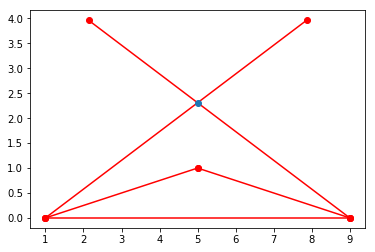

In [7]:
A = 1,0
B = 5,1
C = 9,0
D = get_third_point(A, B, C)
E = get_third_point(B, C, A)
F = get_intersection_point(A, E, C, D)
plt.plot(*zip(A,B), 'ro-')
plt.plot(*zip(A,C), 'ro-')
plt.plot(*zip(B,C), 'ro-')
plt.plot(*zip(C,D), 'ro-')
plt.plot(*zip(A,E), 'ro-')
plt.plot(*F, marker='o');

In [6]:
get_distance(B, C), get_distance(B, E), get_distance(C, E)

(1.4142135623730951, 1.4142135623730951, 1.4142135623730951)